In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
data_dogs = pd.read_csv('../projekt_utulky/fixed_data_shelter_dogs.csv',delimiter=';')
data_dogs.head()

,id,name,status,gender,age,size,breed,cross_breed,childrenFriend,catFriend,...,activeFriend,color,tattoo,neutered,handicap,find_location,region,find_date,actual_location,detailed_description
0,8,Ferda,NaN,Pes,17 let,Střední (31 - 60 cm),Československý vlčák,Kříženec,Unknown,Unknown,...,Unknown,Hnědá,Ne,Ne,Ne,"Rokytnice, sídliště Vltava",NaN,01.08.2013,NaN,Fotogalerie EOL Přijďte vyvenčit tohoto pejska...
1,23,Máca,NaN,Fena,12 let,Střední (31 - 60 cm),Bílý švýcarský ovčák,NaN,Unknown,Unknown,...,Unknown,NaN,Ne,Ne,Ne,NaN,NaN,NaN,NaN,NaN
2,51,Kelly,vrácen majiteli,Pes,17 let,Malá (do 30 cm),Aljašský malamut,Kříženec,Unknown,Unknown,...,Unknown,Černá,Ano,Ne,Ano,NaN,NaN,NaN,NaN,NaN
3,55,Amálka,vrácena majiteli,Fena,14 let,Střední (31 - 60 cm),Belgický ovčák - Tervueren,Kříženec,Unknown,Unknown,...,Unknown,Hnědá,Ne,Ne,Ne,NaN,NaN,NaN,NaN,NaN
4,64,Spit,našel domov,Pes,17 let,Střední (31-60 cm),Rotvajler,Kříženec,ano,ne,...,ne,Černá,Ne,Ne,Ne,NaN,NaN,NaN,Zájmový záchranný chov Hněvice - činnost ukončena,18.8.2014 NAŠEL DOMOV V DUŠNÍKÁCH U ROUDNICE N...


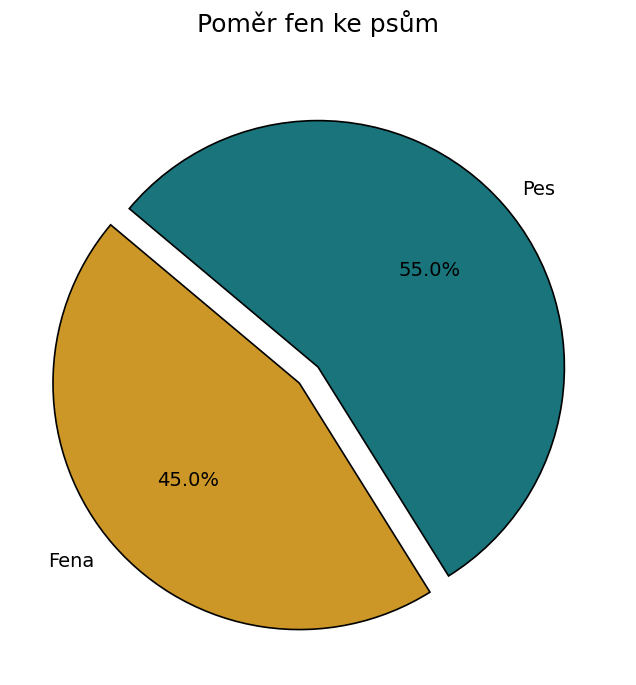

In [27]:
gender_counts = {"Fena": 45, "Pes": 55}

colors = ["#CC9727", "#19747C"]
explode = (0.1, 0)

plt.figure(figsize=(10, 8))
plt.pie(
    gender_counts.values(),
    labels=gender_counts.keys(),
    autopct='%1.1f%%',
    startangle=140,
    textprops={'fontsize': 14},
    colors=colors,
    explode=explode,
    wedgeprops={"edgecolor": "black", "linewidth": 1.2}
)
plt.title('Poměr fen ke psům', fontsize=18, pad=20)
plt.show()

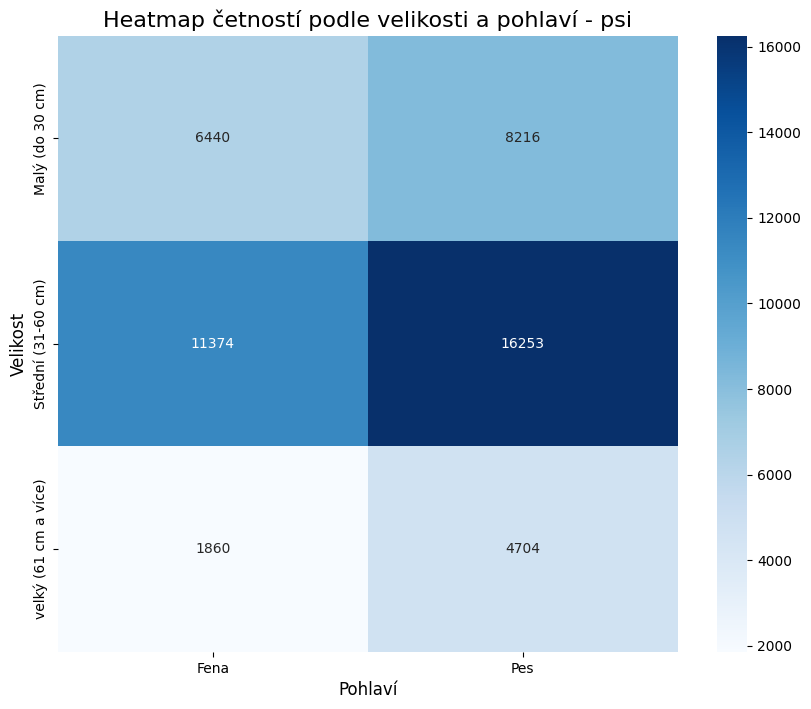

In [28]:
data_dogs['size_standardized'] = data_dogs['size'].str.lower().replace({
    'malá (do 30 cm)': 'Malý (do 30 cm)',
    'malý (do 30 cm)': 'Malý (do 30 cm)',
    'střední (31 - 60 cm)': 'Střední (31-60 cm)',
    'střední (31-60 cm)': 'Střední (31-60 cm)',
    'velká (nad 61 cm)': 'Velký (61 cm a více)',
    'velký (nad 61 cm)': 'Velký (61 cm a více)'
})

frequency_matrix_standardized = pd.crosstab(data_dogs['size_standardized'], data_dogs['gender'])

plt.figure(figsize=(10, 8))
sns.heatmap(frequency_matrix_standardized, annot=True, cmap='Blues', fmt='d', cbar=True)
plt.title('Heatmap četností podle velikosti a pohlaví - psi', fontsize=16)
plt.xlabel('Pohlaví', fontsize=12)
plt.ylabel('Velikost', fontsize=12)
plt.show()


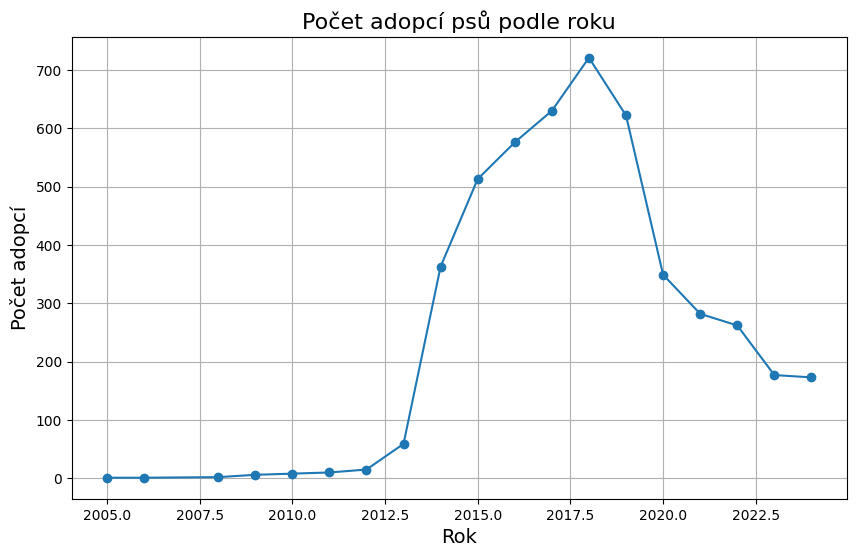

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data_dogs['find_date'] = pd.to_datetime(data_dogs['find_date'], errors='coerce')

adopted_data = data_dogs.dropna(subset=['find_date'])

adopted_data = adopted_data.copy()
adopted_data.loc[:, 'year'] = adopted_data['find_date'].dt.year
adopted_data.loc[:, 'month'] = adopted_data['find_date'].dt.month

yearly_adoptions = adopted_data.groupby('year').size()

plt.figure(figsize=(10, 6))
yearly_adoptions.plot(kind='line', marker='o')
plt.title('Počet adopcí psů podle roku', fontsize=16)
plt.xlabel('Rok', fontsize=14)
plt.ylabel('Počet adopcí', fontsize=14)
plt.grid()
plt.show()


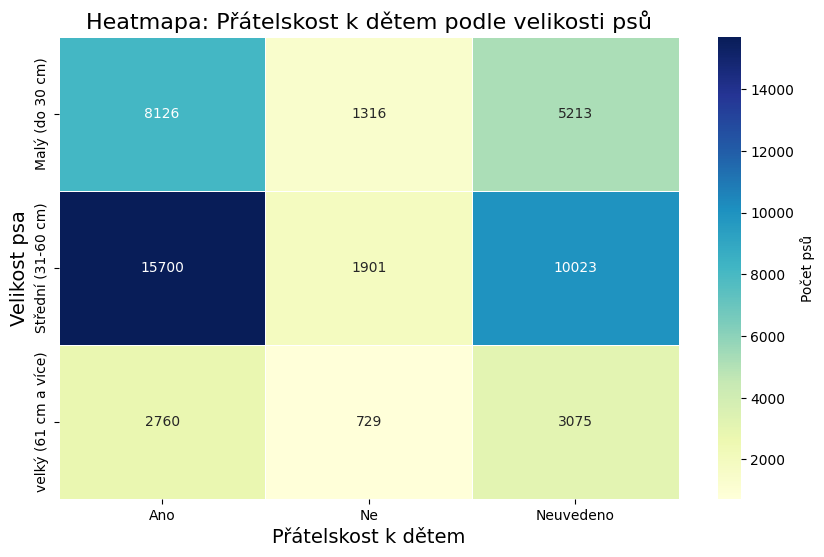

In [30]:
size_mapping = {
    'malá (do 30 cm)': 'Malý (do 30 cm)',
    'malý (do 30 cm)': 'Malý (do 30 cm)',
    'střední (31 - 60 cm)': 'Střední (31-60 cm)',
    'střední (31-60 cm)': 'Střední (31-60 cm)',
    'velká (nad 61 cm)': 'Velký (61 cm a více)',
    'velký (nad 61 cm)': 'Velký (61 cm a více)'
}
data_dogs['size_standardized'] = data_dogs['size'].str.lower().replace(size_mapping)

filtered_data = data_dogs[data_dogs['childrenFriend'] != 'Unknown'].copy()
filtered_data['childrenFriend'] = filtered_data['childrenFriend'].replace({
    'ano': 'Ano',
    'ne': 'Ne',
    'nevim': 'Neuvedeno'
})

heatmap_data = filtered_data.pivot_table(
    index='size_standardized',
    columns='childrenFriend',
    values='id',  # Počet psů jako metrika
    aggfunc='count'
).fillna(0)

def plot_heatmap(data, title):
    plt.figure(figsize=(10, 6))
    sns.heatmap(
        data,
        annot=True,
        fmt='g',
        cmap='YlGnBu',
        linewidths=0.5,
        cbar_kws={'label': 'Počet psů'}
    )
    plt.title(title, fontsize=16)
    plt.xlabel('Přátelskost k dětem', fontsize=14)
    plt.ylabel('Velikost psa', fontsize=14)
    plt.show()

plot_heatmap(heatmap_data, 'Heatmapa: Přátelskost k dětem podle velikosti psů')


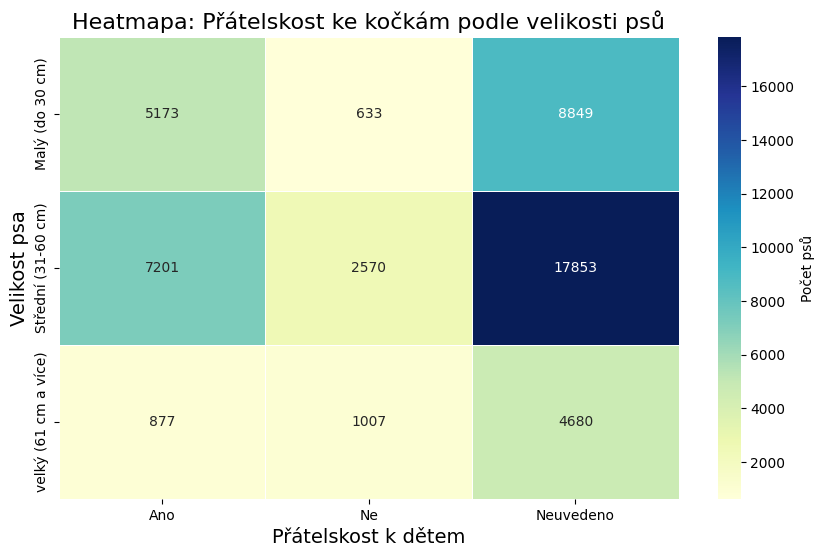

In [31]:
filtered_data_cats = data_dogs[data_dogs['catFriend'] != 'Unknown'].copy()
filtered_data_cats['catFriend'] = filtered_data_cats['catFriend'].replace({
    'ano': 'Ano',
    'ne': 'Ne',
    'nevim': 'Neuvedeno'
})

heatmap_data_cats = filtered_data_cats.pivot_table(
    index='size_standardized',
    columns='catFriend',
    values='id',
    aggfunc='count'
).fillna(0)

plot_heatmap(heatmap_data_cats, 'Heatmapa: Přátelskost ke kočkám podle velikosti psů')


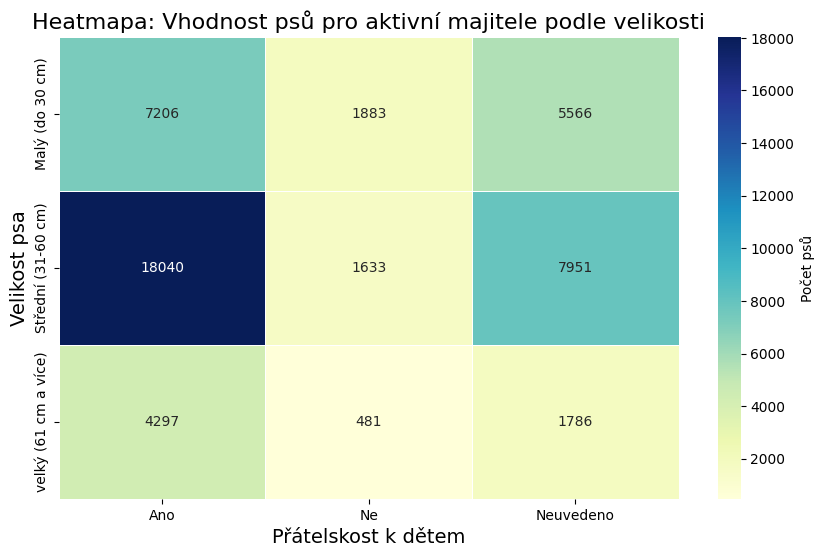

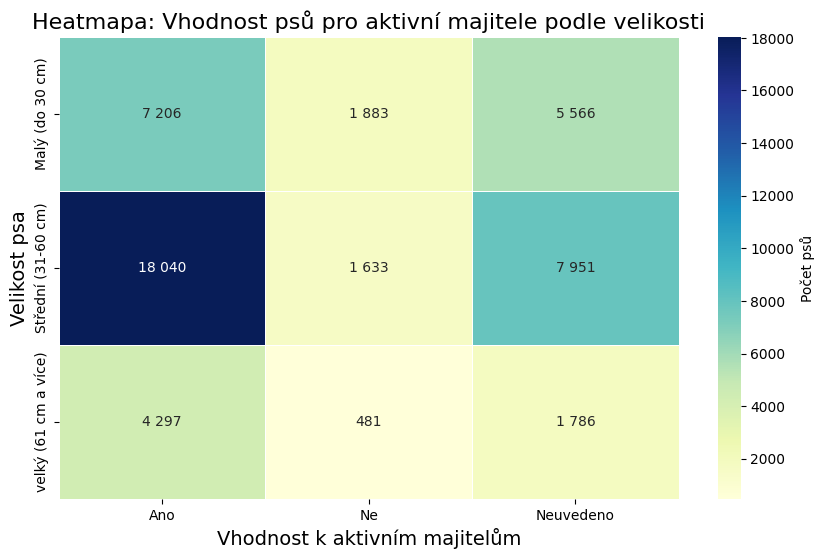

In [32]:
filtered_data_active = data_dogs[data_dogs['activeFriend'] != 'Unknown'].copy()
filtered_data_active['activeFriend'] = filtered_data_active['activeFriend'].replace({
    'ano': 'Ano',
    'ne': 'Ne',
    'nevim': 'Neuvedeno'
})

heatmap_data_active = filtered_data_active.pivot_table(
    index='size_standardized',
    columns='activeFriend',
    values='id',
    aggfunc='count'
).fillna(0)

plot_heatmap(heatmap_data_active, 'Heatmapa: Vhodnost psů pro aktivní majitele podle velikosti')

heatmap_data_active_formatted = heatmap_data_active.map(lambda x: f'{int(x):,}'.replace(',', ' '))

plt.figure(figsize=(10, 6))
sns.heatmap(
    heatmap_data_active,
    annot=heatmap_data_active_formatted,
    fmt='',
    cmap='YlGnBu',
    linewidths=0.5,
    cbar_kws={'label': 'Počet psů'}
)
plt.title('Heatmapa: Vhodnost psů pro aktivní majitele podle velikosti', fontsize=16)
plt.xlabel('Vhodnost k aktivním majitelům', fontsize=14)
plt.ylabel('Velikost psa', fontsize=14)
plt.show()

